In [35]:
import warnings
warnings.filterwarnings(action="ignore")

# **Data Understanding**

In [36]:
import pandas as pd

data = pd.read_csv("bab6_adult_data.csv").drop(columns=["fnlwft", "education_num"])
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- `age`: umur
- `workclass`: kelas pekerjaan
- `education`: tingkat pendidikan terakhir
- `marital_status`: status perkawinan
- `occupation`: pekerjaan
- `relationship`: peran di dalam keluarga
- `race`: jenis ras
- `sex`: jenis kelamin
- `capital_gain`: jumlah keuntungan investasi
- `capital_loss`: jumlah kerugian investasi
- `hours-per-week`: jumlah jam kerja dalam seminggu
- `native-country`: negara asal
- `income`: kategori penghasilan

# **Preprocessing**

##### **1. Mengecek nilai unik dari tiap variabel kategorikal**

- Variabel `workclass`

In [37]:
data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Ditemukan nilai `?` pada variabel `workclass` yang perlu dibenahi dengan mengggantinya dengan nilai yang lebih sesuai, seperti `other`.

In [38]:
data.loc[data["workclass"] == " ?", "workclass"] = "Other"

Setelah diperbaiki, nilai unik pada kolom `workclass` menjadi:

In [39]:
data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Other', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

- Variabel `education`

In [40]:
data["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

- Variabel `marital_status`

In [41]:
data["marital_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

- Variabel `occupation`

In [42]:
data["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

- Variabel `relationship`

In [43]:
data["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

- Variabel `race`

In [44]:
data["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

- Variabel `sex`

In [45]:
data["sex"].unique()

array([' Male', ' Female'], dtype=object)

- Variabel `native_country`

In [46]:
data["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Terdapat nilai yang perlu dibenahi, yaitu `?` dan `Hong`. Keduanya akan lebih baik jika direpresentasikan dengan nilai `other` dan `Hong Kong`.

In [47]:
data.loc[data["native_country"] == " ?", "native_country"] = "Other"
data.loc[data["native_country"] == " Hong", "native_country"] = "Hong Kong"

Setelah diperbaiki, nilai unik pada kolom `native_country` menjadi:

In [48]:
data["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'Other',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam',
       'Hong Kong', ' Ireland', ' Hungary', ' Holand-Netherlands'],
      dtype=object)

- Variabel `income`

In [49]:
data["income"].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

Seharusnya kategori di kolom tersebut hanya boleh dua, yaitu `<=50K` dan `>50K`. Tetapi, terdapat kesalahan input dengan adanya penambahan karakter `.` (titik) di akhir. Hal ini perlu dibenahi.

In [50]:
data.loc[data["income"] == " <=50K.", "income"] = " <=50K"
data.loc[data["income"] == " >50K.", "income"] = " >50K"

Setelah diperbaiki, nilai unik pada kolom `income` menjadi:

In [51]:
data["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

##### **2. Mengecek nilai kosong**

In [52]:
data.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

Tidak ada nilai kosong yang ditemukan pada dataset. Dengan demikian, proses pengisian data kosong (imputasi) tidak perlu dilakukan.

##### **3. Mengecek Noise**

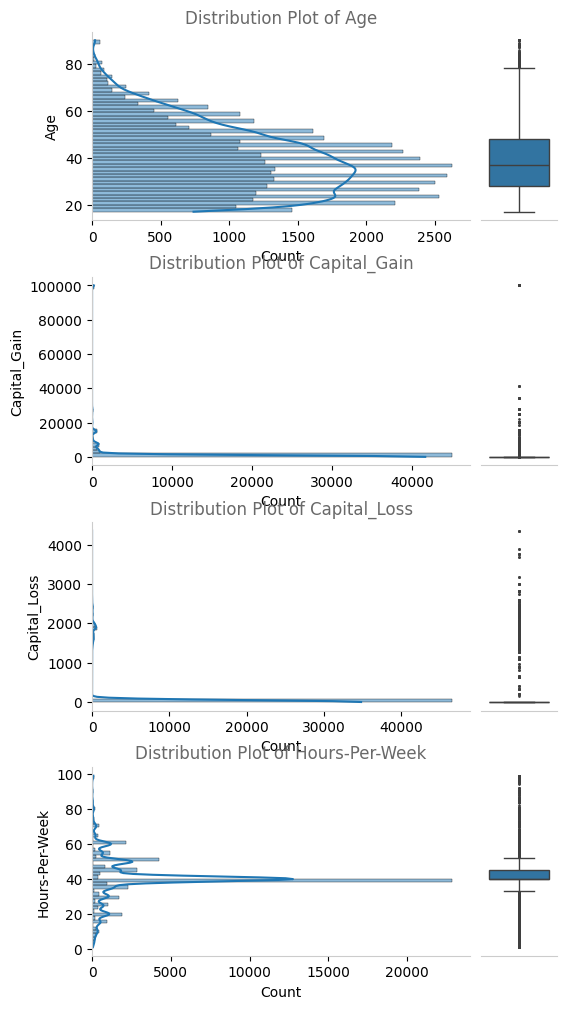

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_variable = ["age", "capital_gain", "capital_loss", "hours-per-week"]

fig, axes = plt.subplots(
    nrows=len(numerical_variable),
    ncols=2,
    figsize=(6, 12),
    gridspec_kw={
        'width_ratios':[5,1],
        'wspace':.05,
        'hspace':.3
    }
)

for i, col in enumerate(data[numerical_variable]):
    #Distribution plot
    sns.histplot(
        data=data,
        y=col,
        bins=50,
        kde=True,
        ax=axes[i,0]
    )

    axes[i,0].set_xlabel('Count')
    axes[i,0].set_ylabel(col.title())
    axes[i,0].set_title(
        'Distribution Plot of {}'.format(col.title()),
        color='dimgrey'
    )

    for n, loc in enumerate(['top','right','left','bottom']):
        axes[i,0].spines[loc].set_visible(False if n < 2 else True)
        axes[i,0].spines[loc].set_color('#CCCCCC')

    #Box plot
    sns.boxplot(
        data[col],
        fliersize=1,
        ax=axes[i,1]
    )

    axes[i,1].set_xlabel('Boxplot')
    axes[i,1].set_ylabel('')
    axes[i,1].xaxis.set_visible(False)
    axes[i,1].yaxis.set_visible(False)

    for n, loc in enumerate(['top','left','right','bottom']):
        axes[i,1].spines[loc].set_visible(False if n < 3 else True)
        axes[i,1].spines[loc].set_color('#CCCCCC')

Berdasarkan plot distribusi data pada variabel numerik, yaitu `age`, `capital_gain`, `capital_loss`, dan `hours-per-week`, terlihat bahwa distribusinya tidak mengikuti distribusi Gaussian. Meskipun demikian, diperlukan perhitungan statistik untuk membuktikannya. Kita akan menggunakan perhitungan Kolmogorov-Smirnov untuk mengetahuinya.

In [54]:
from scipy.stats import kstest

cols, stats_val, p_val, result = [], [], [], []

for column in data[numerical_variable]:
    stat, pvalue = kstest(
        rvs=data[column],
        cdf="norm",
        args=(data[column].mean(), data[column].std())
    )

    cols.append(column)
    stats_val.append(stat)
    p_val.append('> 0.05' if pvalue > 0.05 else '< 0.05')
    result.append(True if pvalue > 0.05 else False)

display(pd.DataFrame(
    data={
        'Statistic':stats_val,
        'P-Value':p_val,
        'Normally Distributed':result
    },
    index=cols
))

,Statistic,P-Value,Normally Distributed
age,0.063157,< 0.05,False
capital_gain,0.474953,< 0.05,False
capital_loss,0.539222,< 0.05,False
hours-per-week,0.247122,< 0.05,False


Ditemukan untuk semua variabel, nilai `p value` berada di bawah ambang 0.05 (di luar interval kepercayaan 95%). Dengan demikian, semua variabel numerik tidak ada yang terdistribusi normal. Perlakuan selanjutnya, yang paling mungkin adalah mengubah nilai variabel numerik tersebut menjadi variabel kategorik agar pengaruh outlier (noise) dapat diredam. Perlakuan ini diperlakukan secara khusus untuk kolom `capital_gain`, `capital_loss`, dan `hours-per-week`.

Konsep utama yang dilakukan adalah dengan menghitung interquantile range (IQR) dan ambang batas suatu nilai dianggap sebagai outlier. Kemudian mengganti nilainya menyesuaikan dengan deskripsi dari nilai yang ditampilkan.

- Variabel `capital_gain`

In [55]:
iqr = data["capital_gain"].quantile(.75) - data["capital_gain"].quantile(.25)
top_notch = data["capital_gain"].quantile(.75) + (1.5 * iqr)

def transform(x, threshold):
    if int(x) > threshold:
        return "gain"
    return "no-gain"

data["capital_gain"] = data["capital_gain"].astype(str)
data["capital_gain"] = data["capital_gain"].apply(func=transform, args=(top_notch,))

Setelah dilakukan transformasi, nilai unik dari variable `capital_gain` menjadi:

In [56]:
data["capital_gain"].unique()

array(['gain', 'no-gain'], dtype=object)

Nilai `gain` merupakah kategori untuk individu yang memiliki keuntungan dalam investasi, berapapun jumlahnya. Disisi lain, nilai `no-gain` adalah sebaliknya.

- Variabel `capital_loss`

In [57]:
iqr = data["capital_loss"].quantile(.75) - data["capital_loss"].quantile(.25)
top_notch = data["capital_loss"].quantile(.75) + (1.5 * iqr)

def transform(x, threshold):
    if int(x) > threshold:
        return "loss"
    return "no-loss"

data["capital_loss"] = data["capital_loss"].astype(str)
data["capital_loss"] = data["capital_loss"].apply(func=transform, args=(top_notch,))

Setelah dilakukan transformasi, nilai unik dari variabel `capital_loss` menjadi:

In [58]:
data["capital_loss"].unique()

array(['no-loss', 'loss'], dtype=object)

Nilai `loss` merupakah kategori untuk individu yang memiliki keuntungan dalam investasi, berapapun jumlahnya. Disisi lain, nilai `no-loss` adalah sebaliknya.

- Variabel `hours-per-week`

In [59]:
iqr = data["hours-per-week"].quantile(.75) - data["hours-per-week"].quantile(.75)
top_notch = data["hours-per-week"].quantile(.75) + (1.5 * iqr)
bottom_most = data["hours-per-week"].quantile(.25) - (1.5 * iqr)

def transform(x, top, bottom):
    if float(x) > top:
        return "intense"
    elif float(x) < top and float(x) > bottom:
        return "normal"
    else:
        return "low"

data["hours-per-week"] = data["hours-per-week"].astype(str)
data["hours-per-week"] = data["hours-per-week"].apply(func=transform, args=(top_notch, bottom_most,))

Setelah dilakukan transformasi, nilai unik dari variabel `hours-per-week` menjadi:

In [60]:
data["hours-per-week"].unique()

array(['low', 'intense', 'normal'], dtype=object)

Nilai `low` menyiratkan bahwa jumlah jam kerja per minggu untuk individu tersebut berada di bawah batas yang dianggap normal, sedangkan `intense` adalah sebaliknya. Untuk nilai yang berada dalam rentang batas bawah dan atas outlier, diberi label `normal`.

- Variabel `age`

Meskipun variabel age juga memiliki noise, tetapi jumlahnya tidak begitu ekstrem dan dapat dibiarkan apa adanya sebagai nuansa nilai dalam data.

##### **4. Preprocessing Result**

In [61]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,gain,no-loss,low,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,no-gain,no-loss,low,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,no-gain,no-loss,low,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,no-gain,no-loss,low,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,no-gain,no-loss,low,Cuba,<=50K


Setelah melalui preprocessing, data sudah siap untuk dianalisis guna memenuhi berbagai keperluan penelitian.

# **Statistik Desktiptif**

In [62]:
data.describe()

,age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [63]:
data.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,2,2,3,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,no-gain,no-loss,low,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,44807,46560,37207,43832,37155


Didapatkan hasil statistika deskriptif sebagai langkah awal untuk memahami karakteristik data secara umum tanpa adanya penarikan kesimpulan atau inferensi.

# **Exploratory Data Analysis**

Pada tahap awal kita mencoba untuk melihat frekuensi dari variabel kategorik yang ada, untuk melihat dominansi nilai di tiap variabel.

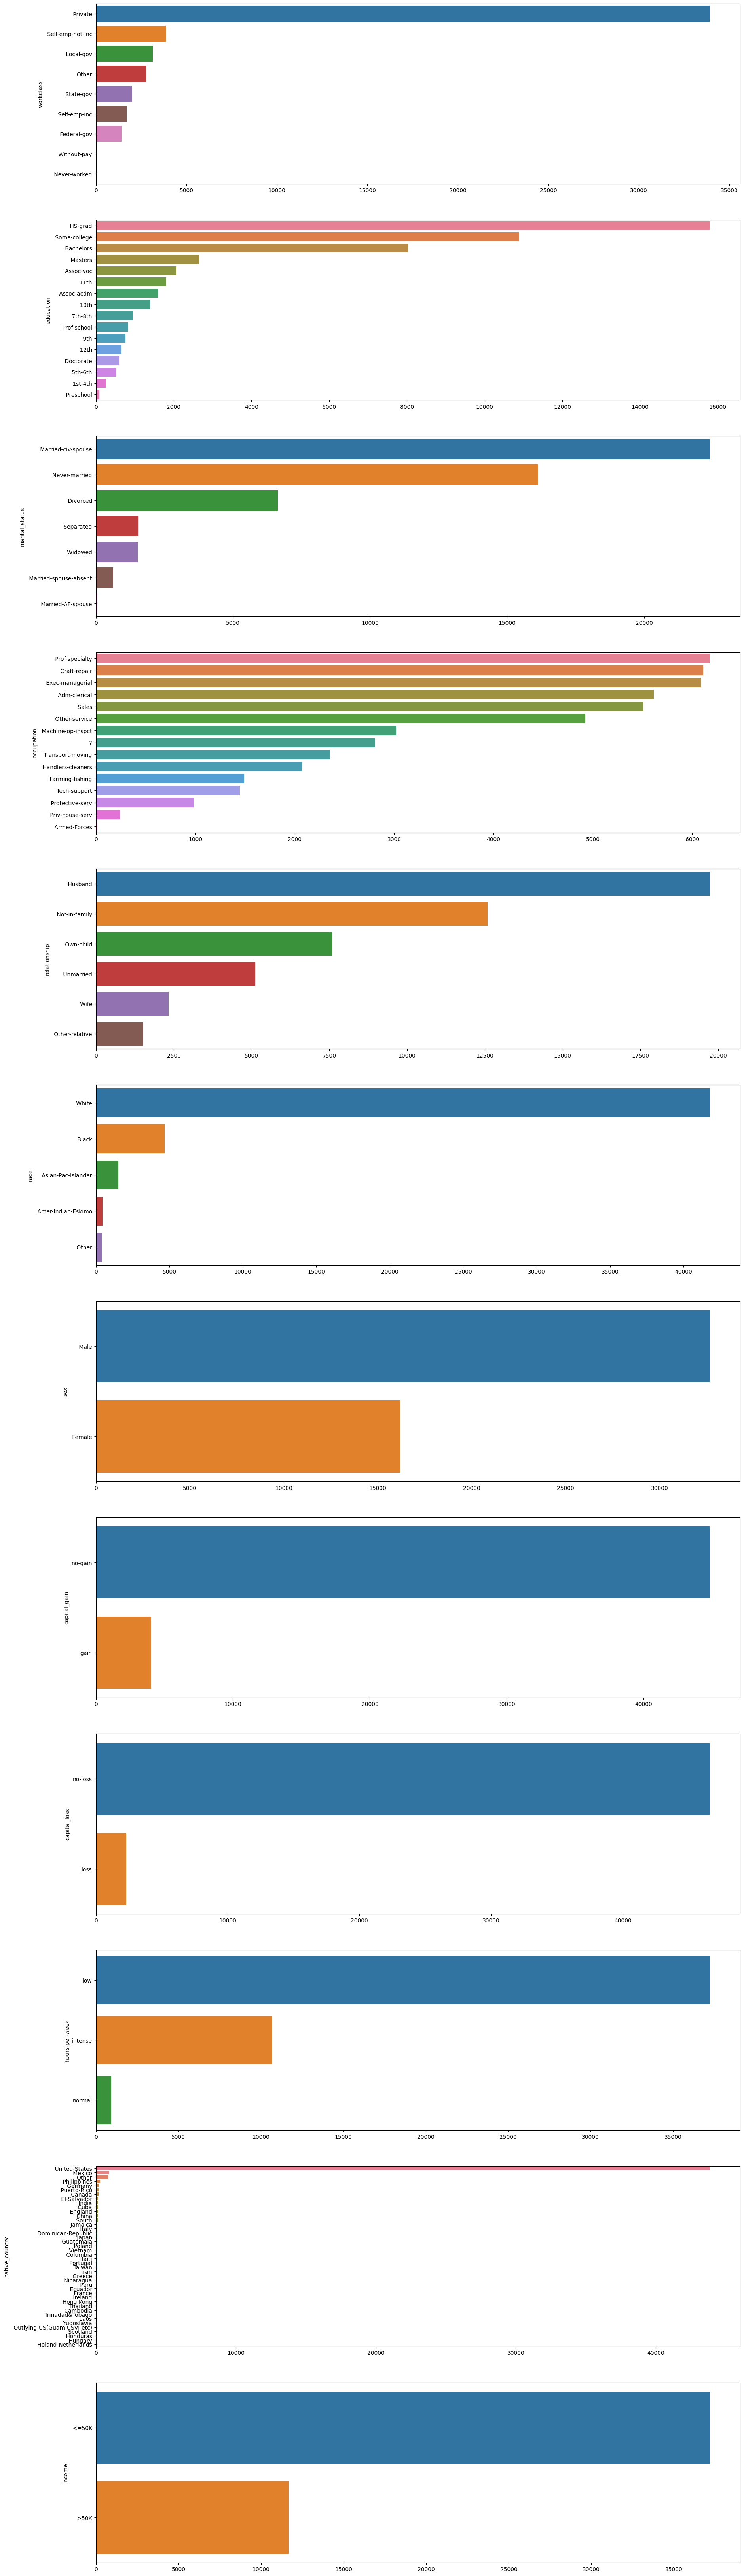

In [64]:
categorical_columns = data.columns[1:]

fig, axes = plt.subplots(
    nrows=len(categorical_columns),
    ncols=1,
    figsize=(21,7*len(categorical_columns)),
    gridspec_kw={
        'hspace':.2
    }
)

for i, column in enumerate(iterable=categorical_columns):
    barplot = sns.barplot(
        x=data[column].value_counts().values,
        y=data[column].value_counts().keys(),
        ax=axes[i],
        hue=data[column].value_counts().keys()
    )

In [65]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,gain,no-loss,low,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,no-gain,no-loss,low,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,no-gain,no-loss,low,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,no-gain,no-loss,low,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,no-gain,no-loss,low,Cuba,<=50K


Karena jumlah nilai unik dari seluruh variabel kategorik terlalu banyak, kita akan fokuskan pada beberapa variabel saja untuk melakukan proses analisa yang lebih mendalam, yaitu `workclass`, `education`, `capital_gain`, `capital_loss`, dan `hours-per-week`.

In [70]:
variable_to_inspect = ["age", "workclass", "education", "capital_gain", "capital_loss", "hours-per-week", "income"]
data = data[variable_to_inspect]
data.head()

,age,workclass,education,capital_gain,capital_loss,hours-per-week,income
0,39,State-gov,Bachelors,gain,no-loss,low,<=50K
1,50,Self-emp-not-inc,Bachelors,no-gain,no-loss,low,<=50K
2,38,Private,HS-grad,no-gain,no-loss,low,<=50K
3,53,Private,11th,no-gain,no-loss,low,<=50K
4,28,Private,Bachelors,no-gain,no-loss,low,<=50K


Kita akan menggunakan model statistika, yaitu logistic regression untuk mengetahui bobot dominan dalam penentuan klasifikasi pendapatan individu.

In [88]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression

binary = OneHotEncoder()
X = pd.DataFrame(
    data=binary.fit_transform(data[data.columns[1:-1]]).toarray(),
    columns=binary.get_feature_names_out()
)

X["age"] = data["age"]

label = LabelBinarizer()
y = label.fit_transform(y=data["income"]).reshape(-1)

logit = LogisticRegression(C=1e9, solver="lbfgs", max_iter=4000, random_state=0)
logit.fit(X=X, y=y)

LogisticRegression(C=1000000000.0, max_iter=4000, random_state=0)

Setelah model dilatih terhadap parameter variabel independen dan dependen, kita dapat mengetahui koefisien bobot masing-masing fitur. Kita akan ambil separuh fitur paling berpengaruh dari seluruh fitur yang ada terhadap hasil pengklasifikasian.

In [127]:
weights = []

for i in logit.coef_.reshape(-1).copy():
    weights.append(abs(i))

feature_weights = dict(zip(list(binary.get_feature_names_out()) + ["age"], weights))
list(dict(sorted(feature_weights.items(), key=lambda x:x[1], reverse=True)))[:15]

['education_ Doctorate',
 'education_ 1st-4th',
 'education_ Prof-school',
 'education_ Masters',
 'education_ Preschool',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ Bachelors',
 'capital_gain_no-gain',
 'education_ 9th',
 'workclass_Other',
 'capital_loss_no-loss',
 'education_ 10th',
 'education_ 11th',
 'hours-per-week_low']

Didapatkan bahwa fitur dari variabel `education` paling banyak muncul. Oleh karena itu, kita akan mencoba untuk melakukan cross-analysis untuk variabel tersebut dengan variabel `income`.

- Hubungan `education` dan `income`.

<Axes: xlabel='education', ylabel='count'>

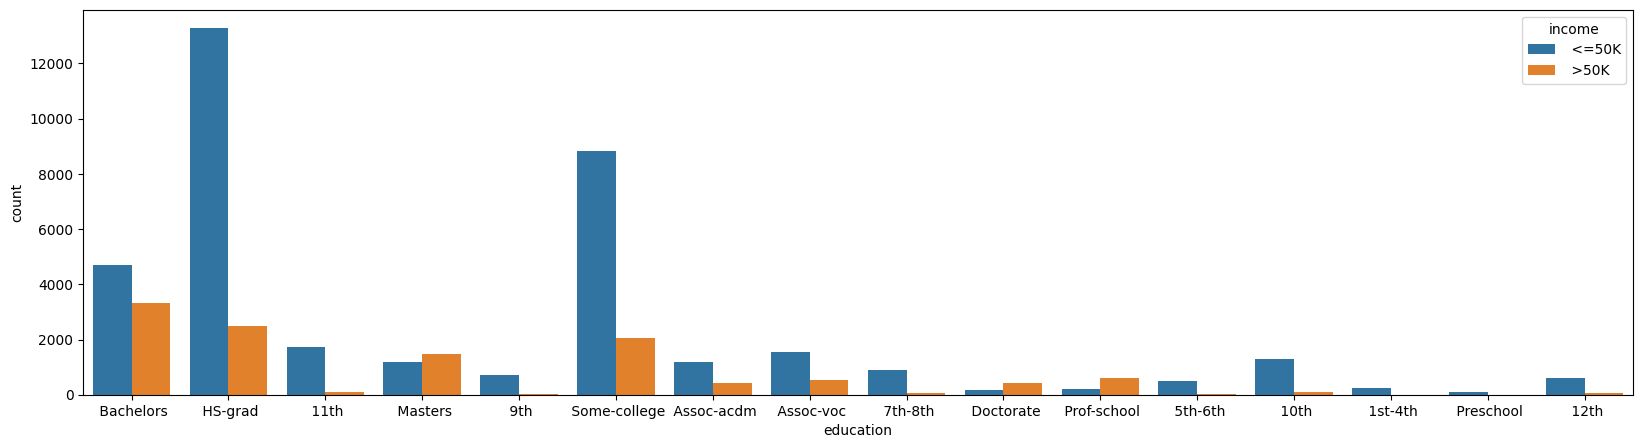

In [136]:
plt.figure(figsize=(20, 5))

sns.countplot(
    data=data,
    x="education",
    hue="income",
    orient="h"
)

Berdasarkan perhitungan di atas, didapatkan bahwa individu dengan pendapatan `>50K` memiliki tingkat pendidikan yang relatif lebih tinggi dibandingkan lainnya, bahkan mereka dengan tingkat pendidikan `doctorate` dan `prof-school` memiliki presentasi lebih dari 50%.